In [2]:
#@title Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import keras.applications as models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import tensorflow as tf
from sklearn.metrics import ConfusionMatrixDisplay
import cv2 as cv

In [8]:
#@title Functions
def Part_b(image_name):
  pred = Predict_labels(image_name)
  Top_3_labels = models.efficientnet.decode_predictions(pred, top = 3)[0]
  print(f'Label 1: {Top_3_labels[0][1]} \twith Probability {Top_3_labels[0][2]}')
  print(f'Label 2: {Top_3_labels[1][1]} \twith Probability {Top_3_labels[1][2]}')
  print(f'Label 3: {Top_3_labels[2][1]} \twith Probability {Top_3_labels[2][2]}')
  return Top_3_labels[0]

def Part_c(image_name):
  pred = Predict_labels(image_name)
  Top_5_labels = models.efficientnet.decode_predictions(pred, top = 5)[0]
  if (Top_5_labels[0][2] < 0.2):
    print("This object is not identified in EfficientNet collection!")
  else:
    print(f'Label: {Top_5_labels[0][1]} \twith Probability {Top_5_labels[0][2]}')

def Read_Data():
  Data = []; Label = []
  Size = (224, 224)
  for i in range(600):
    image = cv.imread(f'dog_{i}.jpg', cv.IMREAD_UNCHANGED)
    if type(image) != type(None):
      Data.append(cv.resize(image, Size))
      Label.append([0])
    image = cv.imread(f'cat_{i}.jpg', cv.IMREAD_UNCHANGED)
    if type(image) != type(None):
      Data.append(cv.resize(image, Size))
      Label.append([1])
  X_train = np.array(Data)[:400]; y_train = np.array(Label)[:400]
  X_test = np.array(Data)[400:]; y_test = np.array(Label)[400:]
  return X_train, y_train, X_test, y_test

def Part_d(X_train, y_train, hidden_size, Epoch):
  model = models.EfficientNetB0(weights = 'imagenet')
  outputs = tf.keras.layers.Dense(2, activation="softmax", name="predictions")(model.layers[-2].output)
  Net = Sequential()
  Net.add(tf.keras.Model(inputs = model.input, outputs = outputs))
  optimizer = SGD(learning_rate=1e-2, momentum = 0.9)
  Net.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
  History = Net.fit(X_train, to_categorical(y_train), epochs = Epoch)
  return Net, History

def Predict_labels(image_name):
  Net = models.EfficientNetB0(weights = 'imagenet')
  image = prepare_Image(image_name)
  pred = Net.predict(image)
  return pred

def prepare_Image(image_name):
  Size = (224, 224)
  image = cv.imread(image_name, cv.IMREAD_UNCHANGED)
  resized_image = cv.resize(image, Size)
  plt.imshow(resized_image)
  expanded_resized_image = np.expand_dims(resized_image, axis = 0)
  return expanded_resized_image

>Part b. 

1/1 [==============================] - 2s 2s/step
Label 1: moped 	with Probability 0.2855878174304962
Label 2: motor_scooter 	with Probability 0.23792120814323425
Label 3: crash_helmet 	with Probability 0.03290800005197525


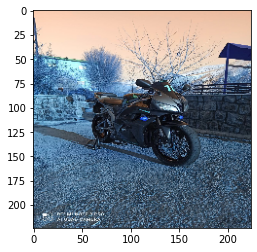

In [ ]:
#@title EfficientNetB0 functional for an example
Top_3_labels = Part_b('Test.jpg')

>Part c. 

1/1 [==============================] - 2s 2s/step
This object is not identified in EfficientNet collection!


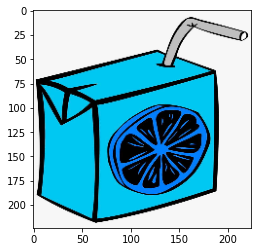

In [ ]:
#@title Implementation of a solution for the object that is not in EfficientNet collection
Top_3_labels = Part_c('Test1.png')

>Part d. Training Model with new Dataset



Text(0.5, 0.98, 'The first 10 images of the Dataset')

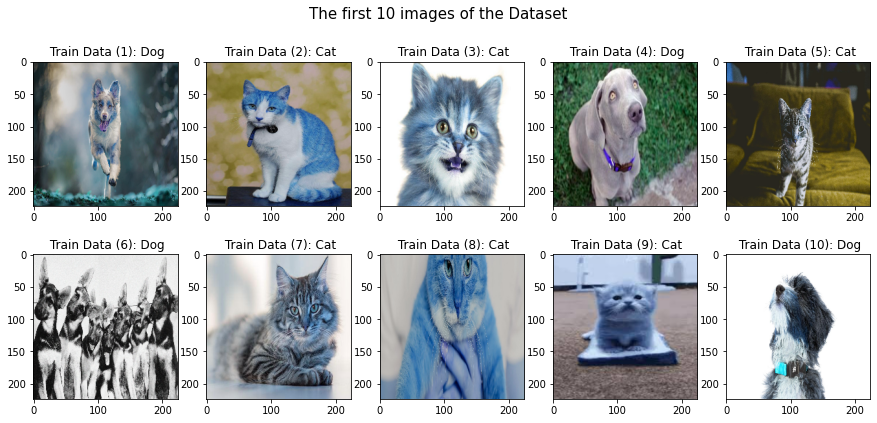

In [4]:
#@title Showing the first 10 images of the Dataset
X_train, y_train, X_test, y_test = Read_Data()
Labels = ['Dog', 'Cat']
plt.figure(figsize=(15, 6.5)) 
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train[i])
  plt.title(f' Train Data ({i+1}): {Labels[y_train[i][0]]}')
plt.suptitle('The first 10 images of the Dataset', fontsize = 15)

In [9]:
#@title Training Model
Net, History = Part_d(X_train, y_train, hidden_size = 500, Epoch = 10)

Epoch 1/10
13/13 [==============================] - 11s 276ms/step - loss: 0.5426 - accuracy: 0.7200
Epoch 2/10
13/13 [==============================] - 4s 281ms/step - loss: 0.1853 - accuracy: 0.9525
Epoch 3/10
13/13 [==============================] - 4s 291ms/step - loss: 0.1040 - accuracy: 0.9650
Epoch 4/10
13/13 [==============================] - 4s 284ms/step - loss: 0.0593 - accuracy: 0.9875
Epoch 5/10
13/13 [==============================] - 4s 280ms/step - loss: 0.0295 - accuracy: 0.9975
Epoch 6/10
13/13 [==============================] - 4s 281ms/step - loss: 0.0260 - accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 4s 277ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 4s 281ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 4s 281ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 4s 281ms/step - loss: 0.0102 - accuracy: 1.000

7/7 [==============================] - 2s 55ms/step
Accuracy = 98.14814925193787%
Test-loss = 0.0520222969353199


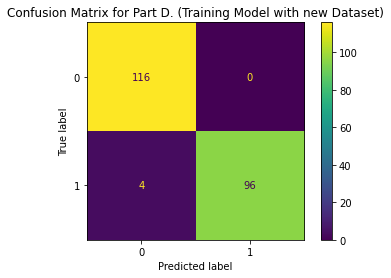

In [10]:
#@title Metrics on test data (Batch-size = 32)
loss_test, acc = Net.evaluate(X_test, to_categorical(y_test), verbose = 0)
pred_test = np.argmax(Net.predict(X_test), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title('Confusion Matrix for Part D. (Training Model with new Dataset)')
print(f'Accuracy = {acc*100}%\nTest-loss = {loss_test}')